# Rot-Schwarz Bäume

## Implementation

Die Datenstruktur die wir nutzen um einen Rot-Schwarz Baum zu implementieren ist sehr ähnlich zu der Implementation von einem klassischen Binären Suchbaum. Im Vergleich zum Binärbaum benötigen wir aber das zusätzliches Feld ```color``` in jedem Knoten um die Farbe zu speichern. Wir definieren uns dafür den Datentyp ```Color```, der die Farbe Rot und Schwarz repräsentieren kann. 

In [1]:
from enum import Enum
class Color(Enum):
        RED = 1
        BLACK = 2
        
        @staticmethod
        def flipColor(color):
            if color == Color.RED:
                return Color.BLACK
            else:
                return Color.RED

Die Methoden ```size```, ```isEmpty```, ```contains``` und ```get``` können wir direkt vom vom binären Suchbaum übernehmen. Die Unterschiede kommen nur zum Tragen, wenn wir den Baum verändern, d.h. Knoten einfügen oder löschen. Wir zeigen hier nur die Methode ```put```. Beachten Sie, wie nach dem Einfügen eines Knotens die Methoden ```rotateLeft```, ```rotateRight```und ```flipColors``` verwendet werden, um sicherzustellen, dass wir wieder einen gültigen Rot-Schwarz Baum bekommen. *Diese Operationen werden durch die Rekursion auf jedem Elternknoten durchgeführt*.

In [2]:
class RedBlackBST:

    class Node:
        def __init__(self, key, value, color, count = 1):
            self.key = key
            self.value = value
            self.count = count
            self.left = None
            self.right = None
            self.color = color # color of parent link
    
    def __init__(self):
        self._root = None

  
    def root(self) : return self._root;
    
    def size(self):
        return self._size(self._root)
    
    def _size(self, root):
        if (root == None):
            return 0
        else:
            return root.count
    
    def isEmpty(self):
        return self.size() == 0
    
    def contains(self, key):
        return self.get(key) != None
    
    def get(self, key): 
        return self._get(key, self._root)
    
    def _get(self, key, node):
        if node == None:
            return None
        elif key < node.key:
            return self._get(key, node.left)
        elif key > node.key:
            return self._get(key, node.right)
        elif key == node.key:
            return node.value
        else:
            raise Exception("should never reach this line")
            
    def put(self, key, value):
        self._root = self._put(key, value, self._root)
        self._root.color  = Color.BLACK;
    
    def _put(self, key, value, node):
        if (node == None):
            return RedBlackBST.Node(key, value, Color.RED, 1)
        elif key < node.key:
            node.left = self._put(key, value, node.left)
        elif key > node.key:
            node.right = self._put(key, value, node.right)
        elif key == node.key:
            node.value = value
      
        if self._isRed(node.right) and not self._isRed(node.left):
            node = self._rotateLeft(node)
        if self._isRed(node.left) and self._isRed(node.left.left):
            node = self._rotateRight(node)
        if self._isRed(node.left) and self._isRed(node.right):
            self._flipColors(node)
 
        node.count = 1 + self._size(node.left) + self._size(node.right)
 
        return node
         
    def _rotateRight(self, node):
        t = node.left;
        node.left = t.right;
        t.right = node;
        t.color = t.right.color;
        t.right.color = Color.RED;
        t.count = node.count;
        node.count = self._size(node.left) + self._size(node.right) + 1;
        return t;

    
    def _rotateLeft(self, node):
        t = node.right;
        node.right = t.left;
        t.left = node;
        t.color = t.left.color;
        t.left.color = Color.RED;
        t.count = node.count;
        node.count = self._size(node.left) + self._size(node.right) + 1;
        return t;
 
        
        
    def _flipColors(self, node):
        
        node.color = Color.flipColor(node.color);
        node.left.color = Color.flipColor(node.left.color);
        node.right.color = Color.flipColor(node.right.color);
        return node
 
    
    def keys(self):
        return self._keys(self._root)
        
    def _keys(self, node):        
        if node == None:
            return []
        else:
            nodesLeft = self._keys(node.left)            
            nodesRight = self._keys(node.right)
            return nodesLeft +[node.key] + nodesRight

    def _isRed(self, node):
        
        if node == None:
            return False
        else:
            return node.color == Color.RED
        
    def height(self):
        return self._height(self._root)
    
    def _height(self, node):
        if node == None:
            return -1
        else:
            return 1 + max(self._height(node.left), self._height(node.right))   

## Visualisierung

Wie bereits beim Binärbaum definieren wir uns die Methode ```plotTree``` um den Baum (diesmal inklusive Farben) zu visualisieren. Die Details der Implementation sind für das Verständnis vom Algorithmus nicht relevant. 

In [3]:
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt

class NodeWithId:
    def __init__(self, key, value, color, id, left, right):
        self.key = key
        self.value = value
        self.id = id
        self.color = color
        self.left = left
        self.right = right
        
def _augmentTreeWithId( t, n):
    if t == None:
        return (None, n)
    else:        
        (leftNode, newN) = _augmentTreeWithId(t.left, n)
        (rightNode, rightN) = _augmentTreeWithId(t.right, newN + 1)
        return (NodeWithId(t.key, t.value, t.color, newN + 1, leftNode, rightNode), rightN )

def _buildTreeGraph(g, t, parentNode, depth, showValues):
    if t == None:
        return
    _buildTreeGraph(g, t.left, t, depth + 1, showValues)
    label = "" 
    if showValues:
        label = str((t.key, t.value))
    else:
        label = str(t.key)
    g.add_node(t.id, pos=(t.id, -depth), label=label)
    if (parentNode != None):
        if t.color == Color.RED:
            g.add_edge(t.id, parentNode.id, color='r')
        else:
            g.add_edge(t.id, parentNode.id, color='black')
    _buildTreeGraph(g, t.right, t, depth + 1, showValues)

def showTree(bst, showValues = False):
    g = nx.Graph()
    (tt, _) = _augmentTreeWithId(bst.root(), 0)
    _buildTreeGraph(g, tt, None, 0,  showValues)
    pos=nx.get_node_attributes(g,'pos')
    labels = nx.get_node_attributes(g, 'label')
    
    edges = g.edges()
    colors = [g[u][v]['color'] for u,v in edges]
    nx.draw_networkx_nodes(g, pos, node_size=500, node_color='#00b4d9')
    nx.draw_networkx_labels(g, pos, labels)
    nx.draw_networkx_edges(g, pos, edge_color = colors, width=5.0,alpha=1.0)
    plt.axis('off')
    plt.show()
    

## Experimente

Als erstes zeigen wir wieder wie der Baum für verschiedene Sequenzen von Schlüsseln aussieht. 

Wir beginnen mit unserem Standardbeispiel:

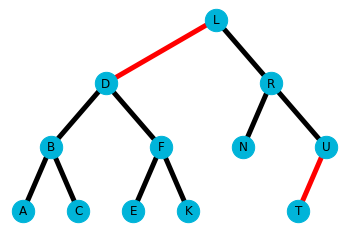

In [4]:
rbt = RedBlackBST()
for (value, key) in enumerate(sorted(list("REDBLACKTREEFUN"))):
    rbt.put(key, value)
showTree(rbt)

Wie wir sehen, ist dies ein gültiger Rot-Schwarz  Baum, der einem 2-3 Baum der Höhe 2 entspricht (Rote Kanten werden zu 3-Knoten). 

Als nächstes testen wir was passiert, wenn wir bereits sortierte Inputs einfügen.

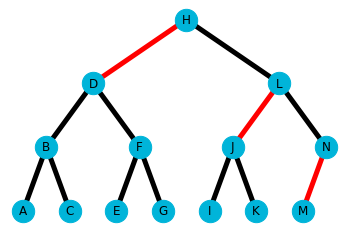

In [5]:
rbt = RedBlackBST()
for (value, key) in enumerate(list("ABCDEFGHIJKLMN")):
    rbt.put(key, value)
showTree(rbt)    

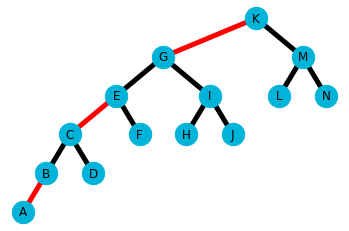

In [6]:
rbt = RedBlackBST()
for (value, key) in enumerate(list("NMLKJIHGFEDCBA")):
    rbt.put(key, value)
showTree(rbt)

Auch hier erhalten wir in beiden Fällen wieder einen gültigen Rot Schwarz Baum. Im Gegensatz zum Binären Suchbaum degeneriert dieser nicht zur Liste. 

#### Übung: 

* Erstellen Sie einen Baum, der nur Rote Kanten hat
    * Nicht möglich per Definition. Falls beide ausgehende Kanten von einem Knoten rot sind werden diese durch die flipColors Funktion beide schwarz.
* Erstellen Sie einen Baum, der nur schwarze Kanten hat
* Was passiert wenn sie als erstes Element zusätlich noch den Buchstaben O einfügen?

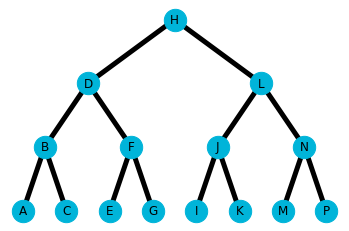

In [7]:
rbt = RedBlackBST()
#rbt.put("O", 0)
for (value, key) in enumerate(list("ABCDEFGHIJKLMNP")):
    rbt.put(key, value)
showTree(rbt)

Als letztes schauen wir uns noch an, wie sich die Höhe verändert, wenn wir immer mehr Schlüssel in den Baum einfügen. 

In [8]:
import random
def randomlyFilledRedBlackBST(num):
    bst = RedBlackBST()
    keys = list(range(0, num))
    random.shuffle(keys)
    for key in keys:
        bst.put(key, "value")
    return bst

In [ ]:
import numpy

Ns = [100, 1000, 5000, 10000, 20000, 50000, 100000]

numRuns = 5
heights = []

for N in Ns:    
    avgHeight = 0    
    for i in range(0, numRuns):
        bst = randomlyFilledRedBlackBST(num=N)
        avgHeight += bst.height()
    heights.append(avgHeight / numRuns)

In [ ]:
import pylab as plt
fig, ax = plt.subplots()
ax.plot(Ns, heights)
ax.plot(Ns, 2 * numpy.log2(Ns))
plt.legend(['Höhe Rot-Schwarz Baum', '2log2(N)'])
plt.show(fig)

Wie erwartet wächst die Höhe logarithmisch und bleibt weit unter des theoretischen Worst-case Bound von $2 \log_2(N)$.